In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv("Dataset.csv")
df.head(5)

,id,name,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,Temp,quality
0,1,Chardonnay,7.4,0.00,1.9,0.076,34.0,73.626253,0.56,9.4,Port,Balanced,39,0
1,2,Cabernet Sauvignon,7.8,0.00,2.6,0.098,67.0,57.670971,0.68,9.8,White,Sour,55,1
2,3,Merlot,7.8,NaN,2.3,0.092,54.0,64.852135,NaN,9.8,Rose,Earthy,89,1
3,4,Pinot Noir,11.2,0.56,1.9,0.075,60.0,82.262859,0.58,9.8,NaN,Bitter,32,0
4,5,Zinfandel,7.4,0.00,1.9,0.076,34.0,69.200715,0.56,9.4,Rose,Balanced,18,0


In [29]:
df.dtypes

id                        int64
name                     object
fixed acidity           float64
citric acid             float64
residual sugar          float64
chlorides               float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
Taste                    object
quality                   int64
dtype: object

## Removing Irrelevant Columns

### Removing columns like "id" and "name" as they are not relevent to our analysis.

In [51]:
df=df.drop(['id','name','Temp'],axis=1)
df.head(5)

,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
0,7.4,0.00,1.9,0.076,34.0,73.626253,0.56,9.4,Port,Balanced,0
1,7.8,0.00,2.6,0.098,67.0,57.670971,0.68,9.8,White,Sour,1
2,7.8,NaN,2.3,0.092,54.0,64.852135,NaN,9.8,Rose,Earthy,1
3,11.2,0.56,1.9,0.075,60.0,82.262859,0.58,9.8,NaN,Bitter,0
4,7.4,0.00,1.9,0.076,34.0,69.200715,0.56,9.4,Rose,Balanced,0


## Checking for any duplicate rows in the dataset and discarding them if any.

In [52]:
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (0, 11)


In [53]:
df.drop_duplicates(inplace=True)
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (0, 11)


## Checking for Null values in Dataset and Removing it


In [54]:
print(df.isnull().sum())

fixed acidity            2
citric acid              3
residual sugar           0
chlorides                1
total sulfur dioxide     5
density                 46
sulphates                2
alcohol                  0
type                     4
Taste                    5
quality                  0
dtype: int64


In [55]:
df = df.dropna()
print(df.isnull().sum())

fixed acidity           0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
Taste                   0
quality                 0
dtype: int64


## Distribution of nominal variables using count plot
#### A count plot is similar to a histogram, but for categorical variables instead of quantitative ones. It's a type of "categorical plot" in Seaborn, which are used to compare different groups.

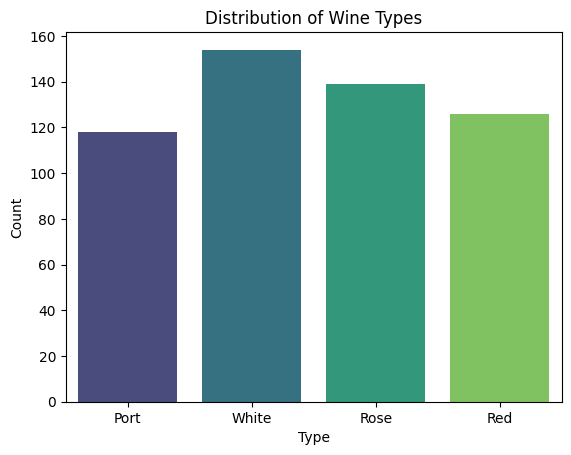

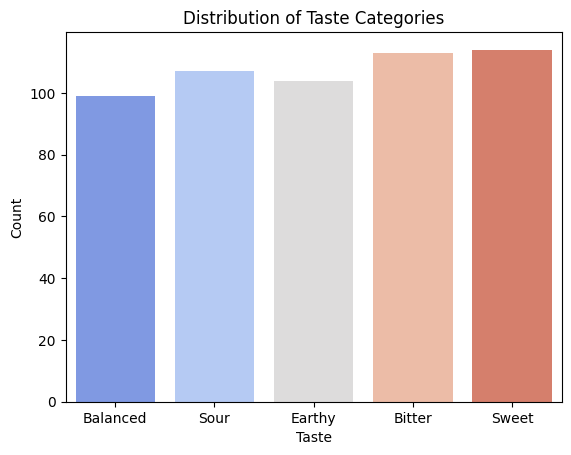

In [56]:
import warnings
warnings.filterwarnings('ignore')


# Plotting the distribution of the 'type' variable
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Distribution of Wine Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

print()
# Plotting the distribution of the 'Taste' variable
sns.countplot(data=df, x='Taste', palette='coolwarm')
plt.title('Distribution of Taste Categories')
plt.xlabel('Taste')
plt.ylabel('Count')
plt.show()

### Heatmap
#### Heatmap is generally used to show the correlation of all the numeric variable to all the other numeric variables.

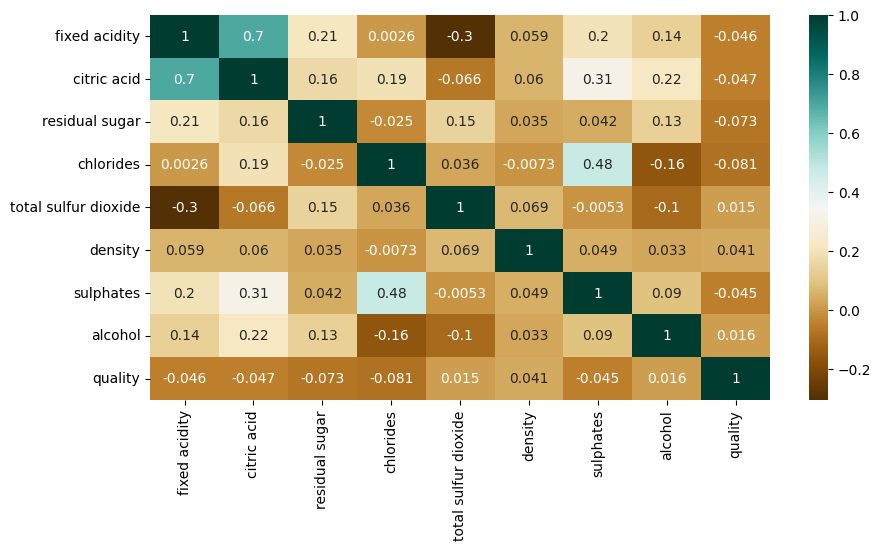

In [57]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

<br>

### Scatter Plot
#### Useful for visualizing the relationship between two continuous variables.


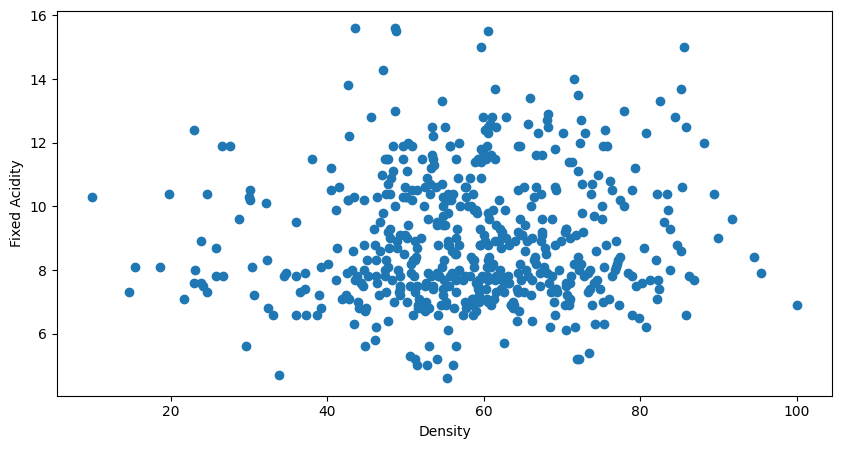

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['density'], df['fixed acidity'])
ax.set_xlabel('Density')
ax.set_ylabel('Fixed Acidity')
plt.show()

## Voilin Plot
#### A violin plot uses density curves to show the distribution of numeric data. The width of each curve represents the approximate frequency of data points in each region.

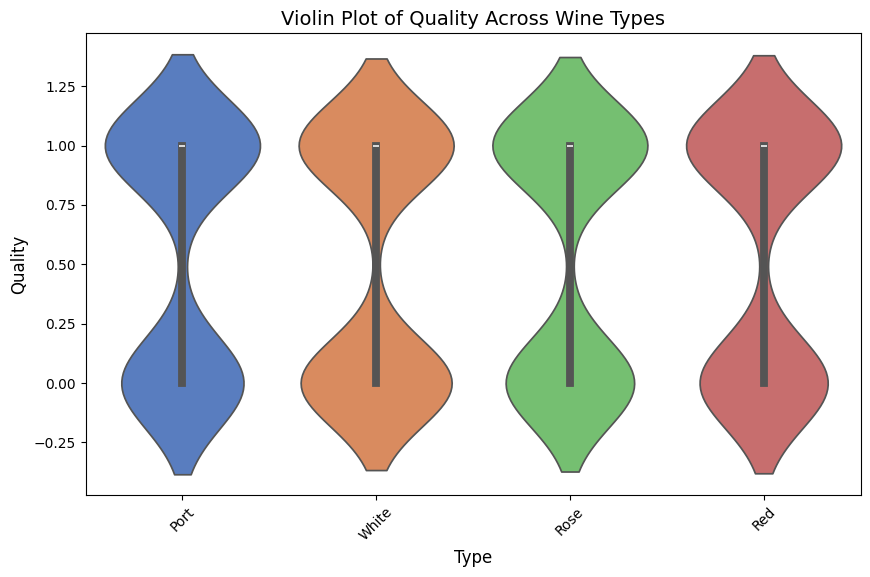

In [59]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='type', y='quality', palette='muted')
plt.title('Violin Plot of Quality Across Wine Types', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Quality', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### The violin plot shows that most wines, regardless of type (Port, White, Rose, Red), have quality scores clustered around 5–6. Rose wines exhibit the most consistent distribution, while White and Red wines show more variability. Extreme quality scores (low or high) are less frequent across all wine types.

## Swarm Plot
#### A swarm plot is a categorical scatter plot that uses dots to represent data points, arranged so that they don't overlap. The arrangement makes the plot look like a swarm of bees.

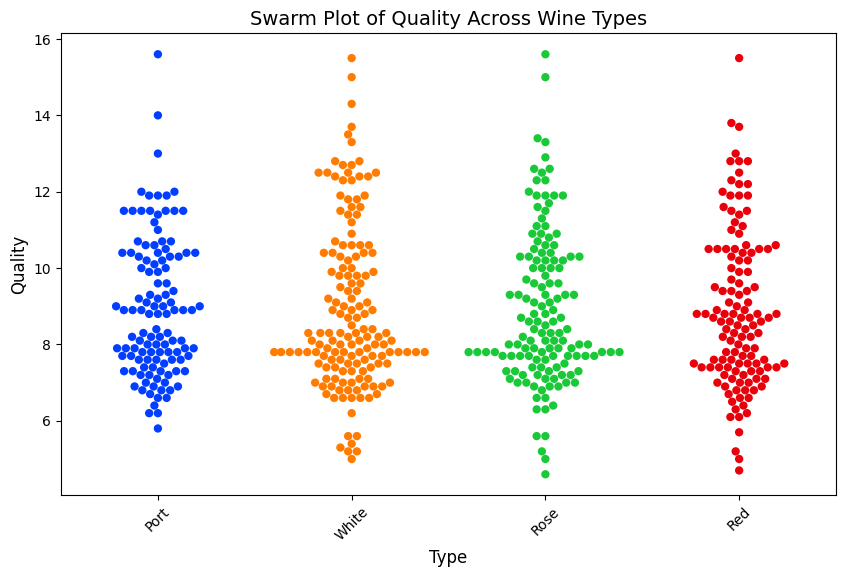

In [60]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='type', y='fixed acidity', palette='bright', size=6)
plt.title('Swarm Plot of Quality Across Wine Types', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Quality', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### The swarm plot shows the distribution of wine quality scores across types (Port, White, Rose, Red). Most wines cluster around mid-range scores (5–6) for all types. Outliers are visible at extreme scores, such as quality 3 or 8, indicating some variability. Rose wines appear more consistent, while others vary slightly more.

In [61]:
# Label Encoding for all non-numeric columns
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric
        df[col] = label_encoder.fit_transform(df[col])

# Display the transformed dataframe
print("Updated Numeric DataFrame:")
print(df.head())

# Verify the data types
print("\nData Types after Encoding:")
print(df.dtypes)

Updated Numeric DataFrame:
   fixed acidity  citric acid  residual sugar  chlorides  \
0            7.4          0.0             1.9      0.076   
1            7.8          0.0             2.6      0.098   
4            7.4          0.0             1.9      0.076   
5            7.4          0.0             1.8      0.075   
7            7.3          0.0             1.2      0.065   

   total sulfur dioxide    density  sulphates  alcohol  type  Taste  quality  
0                  34.0  73.626253       0.56      9.4     0      0        0  
1                  67.0  57.670971       0.68      9.8     3      3        1  
4                  34.0  69.200715       0.56      9.4     2      0        0  
5                  40.0  69.200814       0.56      9.4     1      3        0  
7                  21.0  36.512331       0.47     10.0     2      0        1  

Data Types after Encoding:
fixed acidity           float64
citric acid             float64
residual sugar          float64
chlorides     

# Multi-Layer Perceptron

### Spliting the dataset

In [62]:
X = df.drop('quality', axis=1)
y = df['quality']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

## Create Model Object

In [64]:
# Define parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (150, 75)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01],
    'batch_size': [32, 64]
}

base_mlp = MLPClassifier(
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.2
    )

## Finding Optimal Parameters

In [65]:
print("\nPerforming Grid Search for Optimal Parameters...")
grid_search = GridSearchCV(
    base_mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get best model
mlp = grid_search.best_estimator_
print("\nBest parameters:", grid_search.best_params_)


Performing Grid Search for Optimal Parameters...

Best parameters: {'activation': 'relu', 'alpha': 0.001, 'batch_size': 32, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001}


### Interpretation: The neural network model, optimized with tanh activation, a single hidden layer of 100 neurons, a learning rate of 0.01, and a batch size of 32, achieved an accuracy of 89%.

In [66]:
def plot_learning_curve(estimator, X, y):
    """Plot learning curve to show model's performance with increasing data"""
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1)
    
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    """Plot confusion matrix with percentages"""
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_percent, annot=True, fmt='.1f', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix (%)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_feature_importance(mlp, feature_names):
    """Plot feature importance based on neural network weights"""
    importance = np.abs(mlp.coefs_[0]).mean(axis=1)
    importance = importance / importance.sum()
    
    feat_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feat_importance)
    plt.title('Feature Importance')
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.show()

## Make Predictions & Calculating Accuracy

In [67]:
y_pred = mlp.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


Model Accuracy: 0.4815



Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.64      0.51        45
           1       0.59      0.37      0.45        63

    accuracy                           0.48       108
   macro avg       0.51      0.50      0.48       108
weighted avg       0.52      0.48      0.48       108



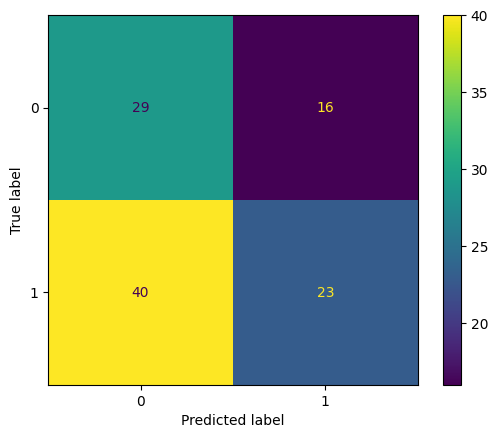

In [69]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Interpretation:
    1. Accuracy: 48% (Below 50%, indicating poor performance)
    2. Macro Average (0.51 precision, 0.50 recall, 0.48 F1-score) shows the model performs poorly across both classes.
    3. Weighted Average shows similar poor results, implying that class imbalance affects performance.

### Key Takeaways:
    1. The model leans towards predicting class 0 more often, as indicated by high false negatives for class 1.
    2. Low recall for class 1 suggests the model struggles to identify class 1 correctly, leading to a potential issue if class 1 represents a critical category (e.g., detecting a disease in a medical model).
    3. The overall accuracy is poor (48%), meaning the model is not making reliable predictions.


Generating Learning Curve...


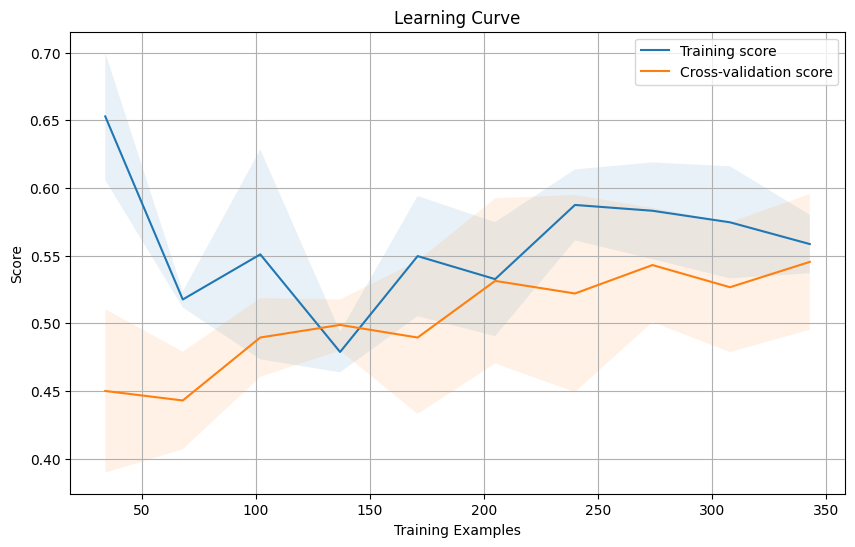

In [70]:
print("\nGenerating Learning Curve...")
plot_learning_curve(mlp, X_train, y_train) 

### Interpretation: The learning curve of the Multi-Layer Perceptron (MLP) shows that the model initially overfits with high training scores and low cross-validation scores. As more data is introduced, the training score declines while the validation score improves, indicating better generalization but still leaving a noticeable gap. The overall low scores suggest potential underfitting, meaning the model may not be complex enough to capture patterns effectively. 

## Plot feature importance


Analyzing Feature Importance...


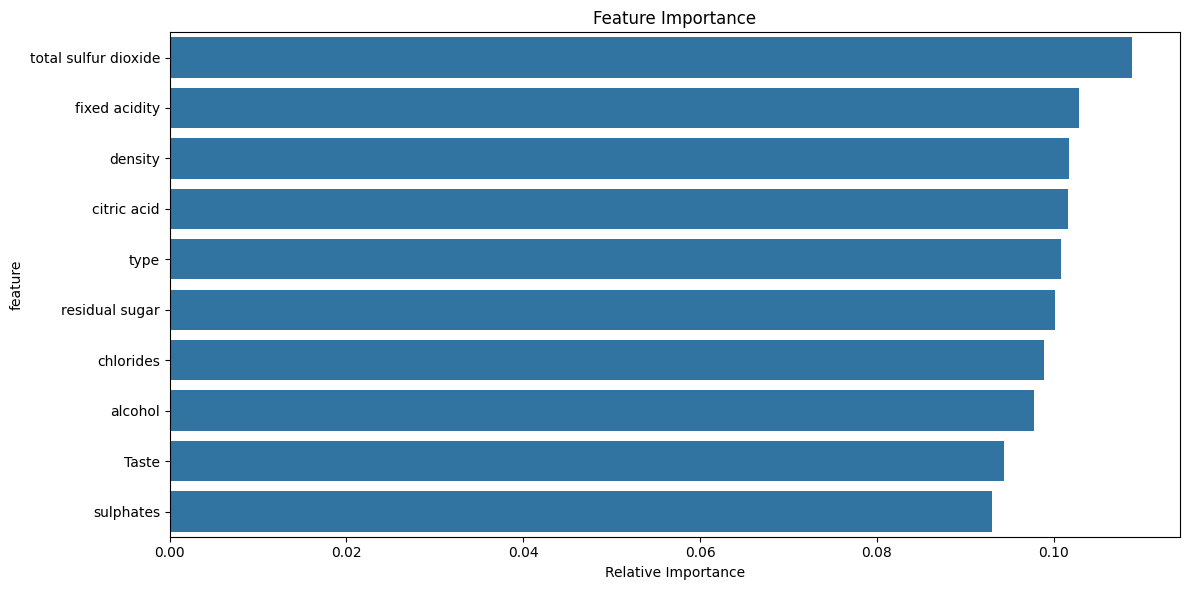

In [71]:
print("\nAnalyzing Feature Importance...")
plot_feature_importance(mlp, X_train.columns)

### The feature importance plot for the Multi-Layer Perceptron (MLP) model highlights the relative contribution of each feature in making predictions. Total sulfur dioxide is the most influential feature, indicating that it has the highest impact on the model’s decision-making. Fixed acidity, density, and citric acid also play significant roles, suggesting that these factors strongly affect the target variable. Other features like residual sugar, chlorides, alcohol, and sulphates contribute moderately, while Taste and type still hold importance but are relatively less impactful. Understanding these feature importances can help in refining the model, optimizing feature selection, and interpreting which factors are most critical for predictions.